# INF-475
## Tarea 2
### Daniel San Martín

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('bmh')
np.random.seed(666)
warnings.filterwarnings("ignore")

### Exploración de los datos

Primero cargamos los datos, revisamos estadísticas generales y graficamos la serie.

In [6]:
df = pd.read_csv('data/river_flows.csv', header=None, names=['date', 'flows'])

In [7]:
df.head()

,date,flows
0,1913-01-31,485
1,1913-02-28,1150
2,1913-03-31,4990
3,1913-04-30,6130
4,1913-05-31,4780


In [8]:
df.describe()

,flows
count,946.000000
mean,2708.573996
std,2123.234239
min,482.000000
25%,1010.000000
50%,1915.000000
75%,3947.500000
max,10800.000000


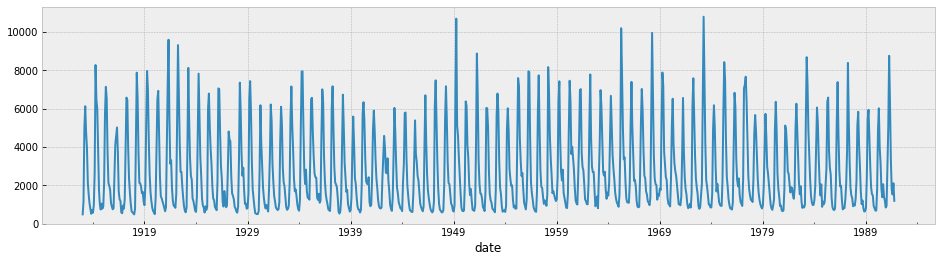

In [20]:
df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
serie = pd.Series(df['flows'])#['flows'].values, index=df['date'])
serie.plot(figsize=(16, 4))
plt.show()

#### Modelo Ingenuo

Realizamos una descomposición de la serie, suponiendo un modelo ingenuo aditivo.

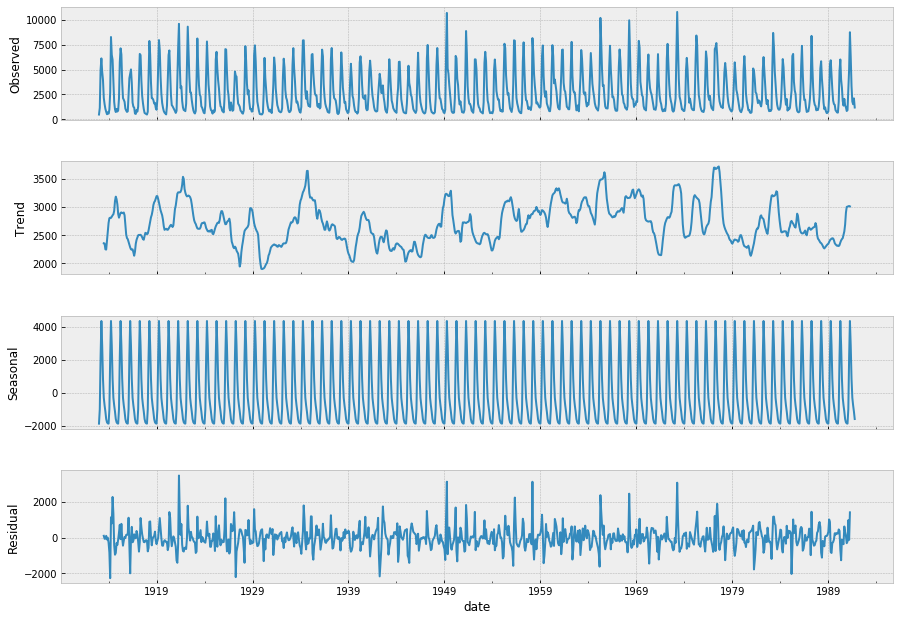

In [125]:
decomposition = seasonal_decompose(serie)
fig = decomposition.plot()
fig.set_size_inches(14,10)
plt.show()

//Como apreciación inicial, pareciera que no hay una dependencia temporal en la tendencia de la serie puesto a que se mantiene acotada cerca de la media.

#### Gráficos de Autocorrelación y Autocorrelación Parcial

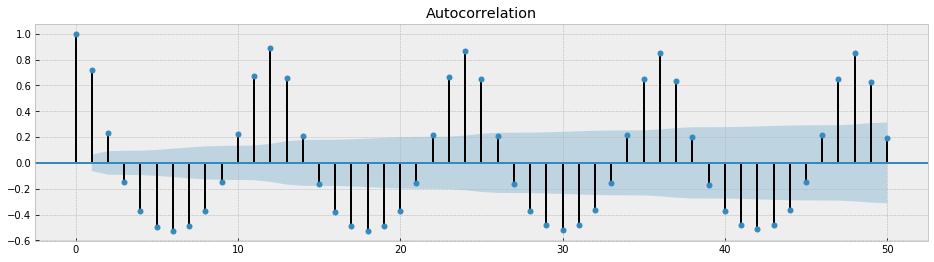

In [166]:
fig = plot_acf(serie, lags=50)
fig.set_size_inches(16, 4)
plt.show()

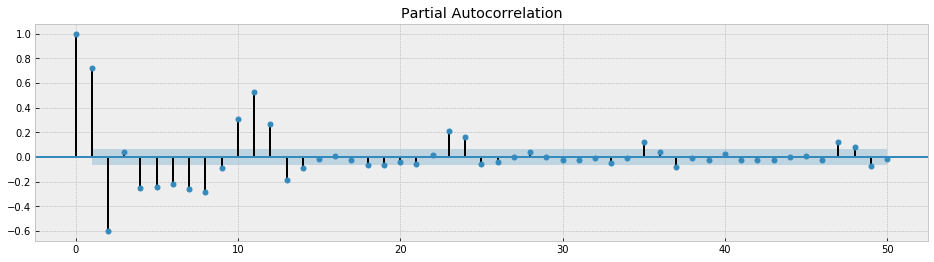

In [62]:
fig = plot_pacf(serie, lags=50)
fig.set_size_inches(16, 4)
plt.show()

Analizando los autocorrelogramas, se puede apreciar claramente la **estacionalidad** de la serie, donde los peaks se repiten cada 12 lags.

#### Tendencia de la serie

Primero intentaremos ajustando una recta para buscar tendencia en la serie.

In [174]:
y = serie
x = np.array(range(1, len(y) + 1))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y.values)
print("Curve: {0}*x + {1}".format(slope, intercept))

Curve: 0.15008059099805382*x + 2637.5108359340916


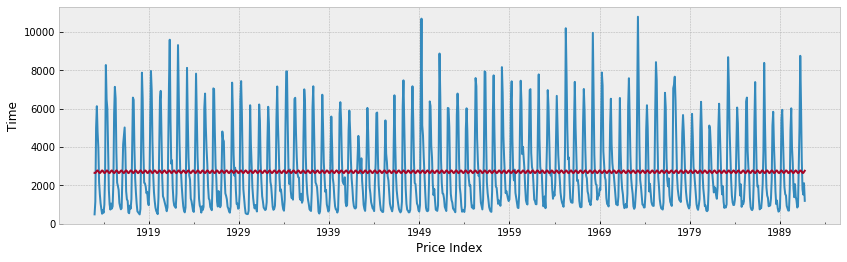

In [176]:
linear_trend = pd.Series(map(lambda x: x*slope + intercept, x), y.index)
y.plot(figsize=(14, 4))
trend.plot()
plt.xlabel('Price Index')
plt.ylabel('Time')
plt.show()

Al intentar ajustar una curva a la tendencia de la serie, notamos que esta no se ve afectada considerablemente por el efecto del tiempo.

Text(0,0.5,'Years')

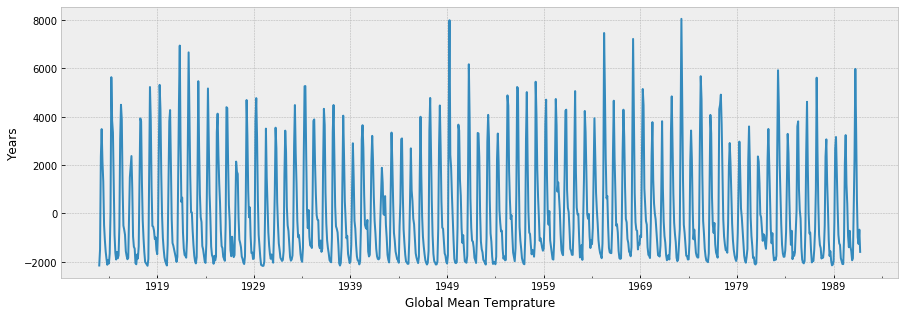

In [177]:
detrend = y - linear_trend
detrend = pd.Series(detrend, y.index)
detrend.plot(figsize=(15,5))
plt.xlabel('Global Mean Temprature')
plt.ylabel('Years')

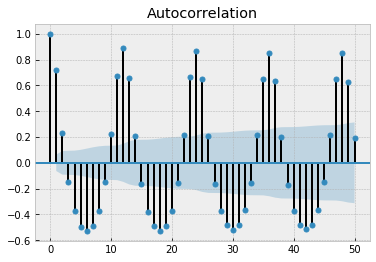

In [179]:
plot_acf(detrend, lags=50)
plt.show()

Como se había comentado anteriormente, vemos que no aporta mucho la tendencia lineal.

Ahora intentaremos buscar la tendencia mediante el ajuste de un polinomio.

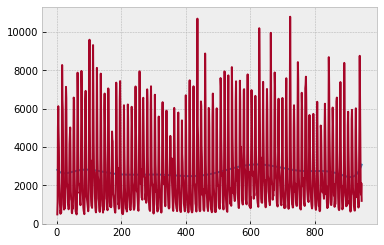

In [184]:
z = np.polyfit(x, y.values, 10)
poly_trend = np.polyval(z, xx)
plt.plot(xx, poly_trend)
plt.plot(x, y)
plt.show()

Notamos de antemano que la curva ajustada no varía mucho en comparación a lo obtenido en la regresión lineal.

Text(0,0.5,'Years')

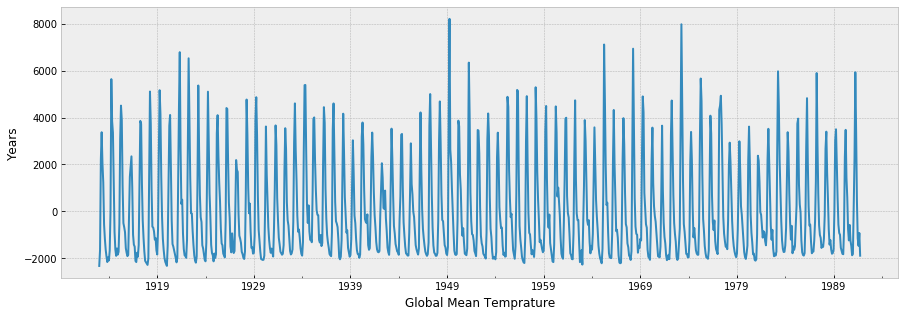

In [185]:
detrend = serie - poly_trend
detrend = pd.Series(detrend, serie.index)
detrend.plot(figsize=(15,5))
plt.xlabel('Global Mean Temprature')
plt.ylabel('Years')

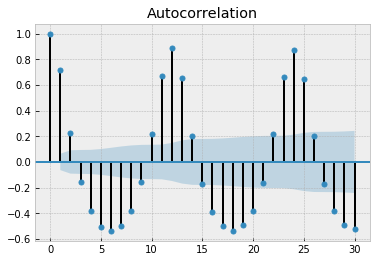

In [187]:
plot_acf(detrend, lags=30)
plt.show()

#### Diferenciando la serie

In [82]:
diff_serie = pd.Series(np.diff(y, n=3))#, index=y.index[6:-6])

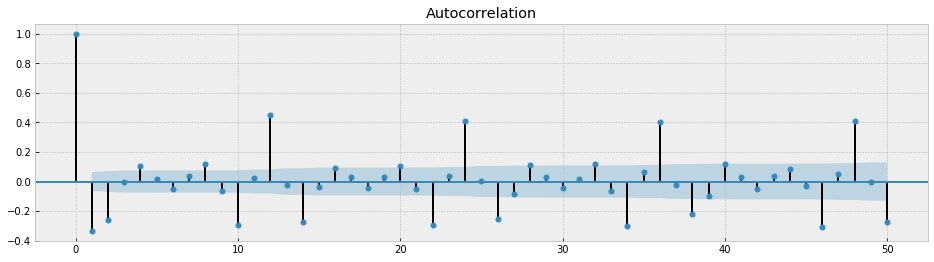

In [83]:
fig = plot_acf(diff_serie, lags=50)
fig.set_size_inches(16, 4)
plt.show()

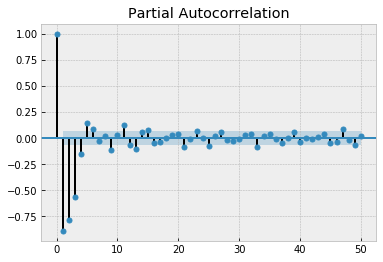

In [51]:
plot_pacf(diff_serie, lags=50)
plt.show()

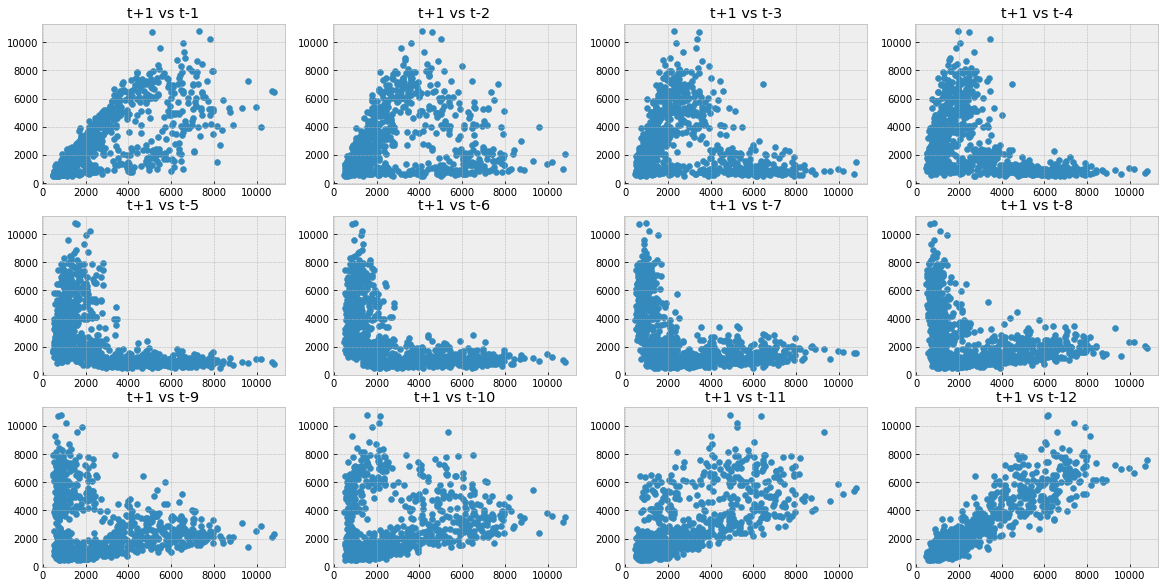

In [66]:
from pandas import concat
from pandas.plotting import scatter_matrix
values = pd.DataFrame(y.values)
lags = 12
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1, figsize=(20,10))
for i in range(1,(lags + 1)):
    ax = plt.subplot(3, 4, i)#plt.subplot(340 + i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()